In [2]:
import tensorflow as tf

In [4]:
import numpy as np
import matplotlib.pyplot as plt 

In [8]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow.keras import Model

In [10]:
train_directory = "images/TRAIN/"
val_directory = "images/TEST/"

In [ ]:
train_dataset = image_dataset_from_directory(
    train_directory,
    image_size=(224,224),
    label_mode="categorical",
    batch_size=32,
    shuffle=True,
)

val_dataset = image_dataset_from_directory(
    val_directory,
    image_size=(224,224),
    label_mode="categorical",
     shuffle=True,
)

In [14]:
# argumentation
argument_layer = tf.keras.Sequential([
    layers.RandomRotation(factor = (-0.025, 0.025)),
    layers.RandomFlip(mode='horizontal',),
],name ="data_augmentation")

In [16]:
# argumentation
resize_rescale_layer = tf.keras.Sequential([
    layers.Resizing(224,224),
    layers.Rescaling(1./255),
],name ="data_resize_rescale")

In [26]:
# resize only
resize_layer = tf.keras.Sequential([
    layers.Resizing(224,224),
],name ="data_resize")

In [18]:
train_dataset = train_dataset.map(lambda x, y: (argument_layer(x, training=True), y)).prefetch(tf.data.AUTOTUNE)

In [20]:
val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)

In [22]:
backbone = tf.keras.applications.EfficientNetB7(
    include_top=False,
    weights='imagenet',
)

258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 123s 0us/step


In [24]:
backbone.trainable = False

In [36]:
inputs = tf.keras.Input(shape=(None,None,3))
x = resize_layer(inputs)
x = backbone(x)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(4, activation='softmax')(x)
model = Model(inputs, outputs)


In [38]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_resize (Sequential)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb7 (Functional)     │ (None, 7, 7, 2560)     │    64,097,687 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2560)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │        10,244 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,107,931 (244.55 MB)

 Trainable params: 10,244 (40.02 KB)

 Non-trainable params: 64,097,687 (244.51 MB)

In [80]:
initial_epochs = 5

In [40]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [42]:
# Fit model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5,
)

Epoch 1/5


2024-08-16 11:36:49.408143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


312/312 ━━━━━━━━━━━━━━━━━━━━ 319s 928ms/step - accuracy: 0.4873 - loss: 1.1744 - val_accuracy: 0.5231 - val_loss: 1.1010
Epoch 2/5
312/312 ━━━━━━━━━━━━━━━━━━━━ 273s 870ms/step - accuracy: 0.6577 - loss: 0.8827 - val_accuracy: 0.5617 - val_loss: 1.0285
Epoch 3/5
312/312 ━━━━━━━━━━━━━━━━━━━━ 328s 1s/step - accuracy: 0.7104 - loss: 0.7853 - val_accuracy: 0.5505 - val_loss: 1.0488
Epoch 4/5
312/312 ━━━━━━━━━━━━━━━━━━━━ 298s 945ms/step - accuracy: 0.7242 - loss: 0.7253 - val_accuracy: 0.5641 - val_loss: 1.0345
Epoch 5/5
312/312 ━━━━━━━━━━━━━━━━━━━━ 301s 959ms/step - accuracy: 0.7422 - loss: 0.6892 - val_accuracy: 0.5686 - val_loss: 1.0423


In [44]:
model.evaluate(val_dataset)

78/78 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.5604 - loss: 1.0456


[1.041576623916626, 0.5685564875602722]

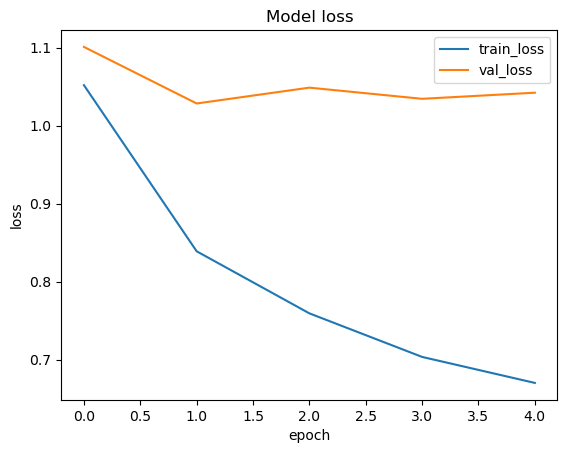

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

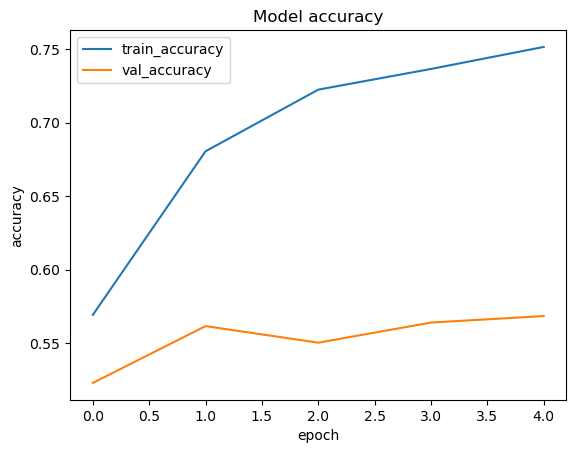

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [50]:
model.layers

[<InputLayer name=input_layer_6, built=True>,
 <Sequential name=data_resize, built=True>,
 <Functional name=efficientnetb7, built=True>,
 <GlobalAveragePooling2D name=global_average_pooling2d_2, built=True>,
 <Dense name=dense_2, built=True>]

In [56]:
model_base_model = model.layers[2]

In [58]:
model_base_model.name

'efficientnetb7'

In [60]:
print(len(model_base_model.trainable_variables))

0


In [62]:
# Make all the layers in model_2_base_model trainable
model_base_model.trainable = True

In [64]:
# Freeze all layers except for the last 10
for layer in model_base_model.layers[:-10]:
  layer.trainable = False

In [66]:
# Recompile the whole model (always recompile after any adjustments to a model)
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

In [76]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_resize (Sequential)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb7 (Functional)     │ (None, 7, 7, 2560)     │    64,097,687 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2560)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │        10,244 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,107,931 (244.55 MB)

 Trainable params: 5,345,444 (20.39 MB)

 Non-trainable params: 58,762,487 (224.16 MB)

In [78]:
print(len(model.trainable_variables))

12


In [84]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_tune = model.fit(train_dataset,
                                               epochs=fine_tune_epochs,
                                               validation_data=val_dataset,
                                               initial_epoch=history.epoch[-1], # start from previous last epoch
                                               )


Epoch 5/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 488s 1s/step - accuracy: 0.7734 - loss: 0.5755 - val_accuracy: 0.6269 - val_loss: 1.4265
Epoch 6/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 302s 957ms/step - accuracy: 0.8737 - loss: 0.3385 - val_accuracy: 0.6317 - val_loss: 1.4095
Epoch 7/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 408s 1s/step - accuracy: 0.9032 - loss: 0.2673 - val_accuracy: 0.6405 - val_loss: 1.5649
Epoch 8/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 329s 1s/step - accuracy: 0.9213 - loss: 0.2117 - val_accuracy: 0.6872 - val_loss: 1.1684
Epoch 9/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 381s 1s/step - accuracy: 0.9371 - loss: 0.1832 - val_accuracy: 0.6506 - val_loss: 1.5898
Epoch 10/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 330s 1s/step - accuracy: 0.9412 - loss: 0.1678 - val_accuracy: 0.6486 - val_loss: 1.5224


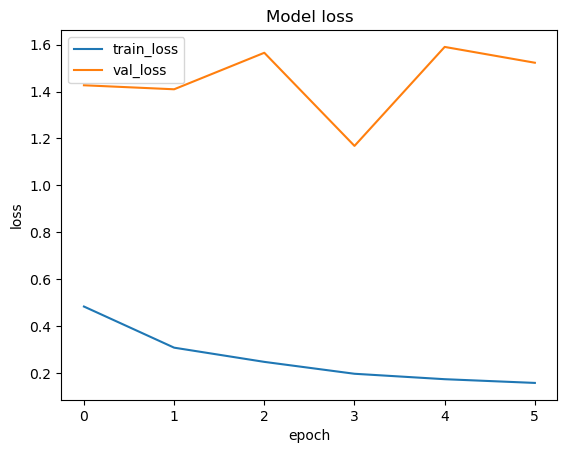

In [85]:
plt.plot(history_fine_tune.history['loss'])
plt.plot(history_fine_tune.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

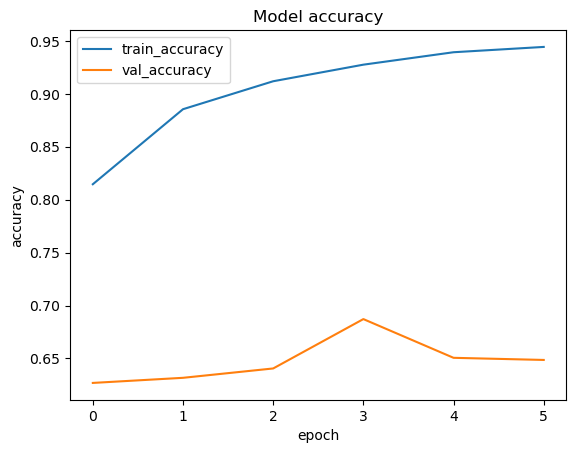

In [88]:
plt.plot(history_fine_tune.history['accuracy'])
plt.plot(history_fine_tune.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [90]:
model.evaluate(val_dataset)

78/78 ━━━━━━━━━━━━━━━━━━━━ 63s 722ms/step - accuracy: 0.6559 - loss: 1.5106


[1.5183309316635132, 0.648572564125061]